# YOLOv8 implementation 

## Data processing step

In this step I split the image chips and labels into trainig and test sets, while also preserving the label - image pair order, so that no image chip is without the corresponding label.

In [42]:

import os
import shutil
from sklearn.model_selection import train_test_split

# Image chips and labels directories
image_chips_directory = "F:\\uni\\year 3_sem_1\\AINE\\project\\image_chips\\image_chips_hd"
labels_directory = 'F:\\uni\\year 3_sem_1\\AINE\\project\\labels\\labels_hd'

# The directories where I place train-test split
train_images_directory = '~\\train_images'
train_labels_directory = '~\\train_labels'
test_images_directory = '~\\test_images'
test_labels_directory = '~\\test_labels'

# Create the train-test directories if they don't exist
os.makedirs(train_images_directory, exist_ok=True)
os.makedirs(train_labels_directory, exist_ok=True)
os.makedirs(test_images_directory, exist_ok=True)
os.makedirs(test_labels_directory, exist_ok=True)

# Get a list of all image chip names (without the extension)
image_files = [os.path.splitext(file)[0] for file in os.listdir(image_chips_directory) if file.endswith('.tif')]

# Perform a train-test split
train_files, test_files = train_test_split(image_files, test_size=0.2)  # 0.2 for tests

# Function to copy files to the designated directories
def copy_files(file_list, source_directory, destination_directory, extension):
    for file_base in file_list:
        file_name = f"{file_base}.{extension}"
        shutil.copy(os.path.join(source_directory, file_name), os.path.join(destination_directory, file_name))

# Copy the training files
copy_files(train_files, image_chips_directory, train_images_directory, 'tif')
copy_files(train_files, labels_directory, train_labels_directory, 'txt')

# Copy the testing files
copy_files(test_files, image_chips_directory, test_images_directory, 'tif')
copy_files(test_files, labels_directory, test_labels_directory, 'txt')

# Confirmatrion message 
print("Train-test split and copy done")


Train-test split and copy done.


In this step i simply just put the label and image files together so they are ready to be converted and then used as input in YOLO

In [44]:
import shutil
import os
import yaml

# Define source label directories and destination image directories
train_labels_src = "F:\\uni\\year 3_sem_1\\AINE\\project\\~\\train_labels"
train_images_dest = "F:\\uni\\year 3_sem_1\\AINE\\project\\~\\train_images"

test_labels_src = "F:\\uni\\year 3_sem_1\\AINE\\project\\~\\test_labels"
test_images_dest = "F:\\uni\\year 3_sem_1\\AINE\\project\\~\\test_images"

# Function to move labels to the corresponding image folders
def move_labels_to_image_dir(labels_src, images_dest):
    for label_file in os.listdir(labels_src):
        # Construct full path to source label file
        src_label_path = os.path.join(labels_src, label_file)
        # Construct full path to destination label file
        dest_label_path = os.path.join(images_dest, label_file)
        # Move label file
        shutil.move(src_label_path, dest_label_path)

# Move the train and test labels to the image folders
move_labels_to_image_dir(train_labels_src, train_images_dest)
move_labels_to_image_dir(test_labels_src, test_images_dest)

# Create the dataset.yaml file
data_config = {
    'train': train_images_dest, # Train set 
    'val': test_images_dest, # Validation set
    'nc': 3,  # Number of classes
    'names': ['high confidence', 'moderate confidence', 'low confidence']  # Class names
}

# Configuration to a yaml file
with open('dataset.yaml', 'w') as file:
    yaml.dump(data_config, file, default_flow_style=False)
    
# Confirmation message  
print("Moved labels and created yaml file")


Moved labels and created yaml file


In [1]:
# Import the neccessary library and the model 
from ultralytics import YOLO

model = YOLO('yolov8n.pt')


In [2]:
# Train the model using  'dataset,yaml' dataset for 50 epochs
results = model.train(data='dataset.yaml', epochs=50)

# Evaluate the model's performance
results = model.val(data = 'dataset.yaml')


New https://pypi.org/project/ultralytics/8.0.210 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.209  Python-3.9.12 torch-2.1.0+cpu CPU (AMD Ryzen 5 5600X 6-Core Processor)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnost


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/50         0G      1.149     0.7839       1.05          1        640: 100%|██████████| 128/128 [07:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:50
                   all        509       5609      0.972       0.29      0.334      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/50         0G      1.109     0.7457      1.028         13        640: 100%|██████████| 128/128 [07:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:51
                   all        509       5609      0.625      0.314       0.33      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/50         0G      1.093     0.7297      1.029          8        640: 100%|██████████| 128/128 [

      28/50         0G      0.899     0.5699     0.9771          3        640: 100%|██████████| 128/128 [07:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:50
                   all        509       5609      0.896       0.84      0.869      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/50         0G     0.8741     0.5326     0.9477          5        640: 100%|██████████| 128/128 [07:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:51
                   all        509       5609      0.903      0.754      0.827      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/50         0G      0.853     0.5222     0.9394         59        640: 100%|██████████| 128/128 [07:58<00:00,  
                 Class     Images  Instances      Box(P         

In [8]:
import pandas as pd
# Loading the results csv for analysis and getting the mettrics I need
result_data = pd.read_csv("F:\\uni\\year 3_sem_1\\AINE\\project\\runs\\detect\\train6\\results.csv")
# I examine the data head just to make sure it's loaded properly
print(result_data.head())
print(result_data.columns)

                     epoch           train/box_loss           train/cls_loss  \
0                        1                   1.5766                  1.99270   
1                        2                   1.3273                  1.13320   
2                        3                   1.2972                  1.05340   
3                        4                   1.2537                  0.96506   
4                        5                   1.2209                  0.96760   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.2857                  0.89098                  0.20793   
1                   1.1311                  0.91847                  0.25301   
2                   1.1216                  0.92897                  0.24577   
3                   1.0954                  0.93254                  0.25700   
4                   1.0820                  0.92236                  0.25813   

          metrics/mAP50(B)      metric

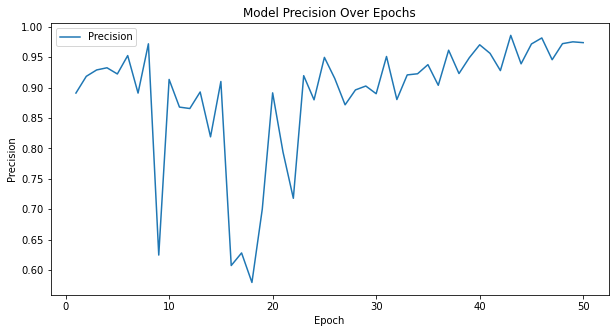

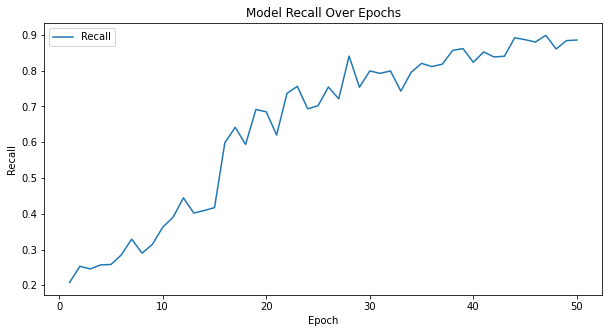

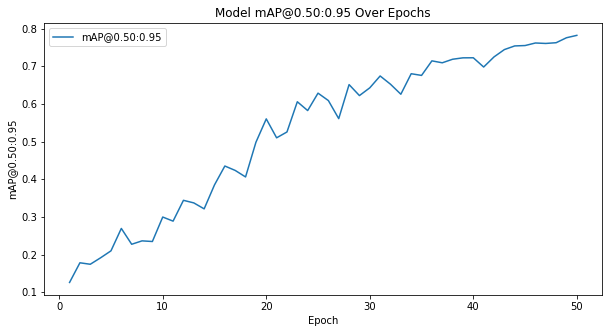

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Results are loaded I run the code to get the desired polots
# Plot precision
plt.figure(figsize=(10, 5))
plt.plot(result_data['                  epoch'], result_data['   metrics/precision(B)'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Model Precision Over Epochs')
plt.legend()
plt.show()

# Plot recall
plt.figure(figsize=(10, 5))
plt.plot(result_data['                  epoch'], result_data['      metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Model Recall Over Epochs')
plt.legend()
plt.show()

# Plot mAP@0.50:0.95
plt.figure(figsize=(10, 5))
plt.plot(result_data['                  epoch'], result_data['    metrics/mAP50-95(B)'], label='mAP@0.50:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.50:0.95')
plt.title('Model mAP@0.50:0.95 Over Epochs')
plt.legend()
plt.show()
